In [1]:
pip install pandas matplotlib seaborn streamlit

Note: you may need to restart the kernel to use updated packages.


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# visualization setup
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid")


print("Loading CORD-19 metadata...")
try:
    df = pd.read_csv('metadata.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("metadata.csv not found in current directory")
    print("Please download it from: https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge")
    # Let's create a sample structure for demonstration
    print("Creating sample data structure for demonstration purposes...")
    data = {
        'title': ['COVID-19 transmission patterns', 'Vaccine efficacy study', 'SARS-CoV-2 genome analysis'],
        'abstract': ['Study of transmission patterns in urban areas', 'Analysis of vaccine effectiveness', 'Genomic sequencing of virus variants'],
        'publish_time': ['2020-03-15', '2021-06-20', '2022-01-10'],
        'journal': ['Lancet', 'Nature', 'Science'],
        'authors': ['Smith J, Johnson A', 'Brown K, Davis L', 'Wilson M']
    }
    df = pd.DataFrame(data)

📁 Loading CORD-19 metadata...
✅ Data loaded successfully!


In [5]:

print("=" * 50)
print("📊 BASIC DATA EXPLORATION")
print("=" * 50)

# Check DataFrame dimensions
print(f"Dataset dimensions: {df.shape[0]} rows, {df.shape[1]} columns")

# Examine first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Data structure information
print("\nDataset info:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_df)

# Basic statistics for numerical columns (if any)
print("\nBasic statistics:")
print(df.describe(include='all'))

📊 BASIC DATA EXPLORATION
Dataset dimensions: 1056660 rows, 19 columns

First 5 rows of the dataset:
   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id licens

📈 INITIAL DATA VISUALIZATIONS


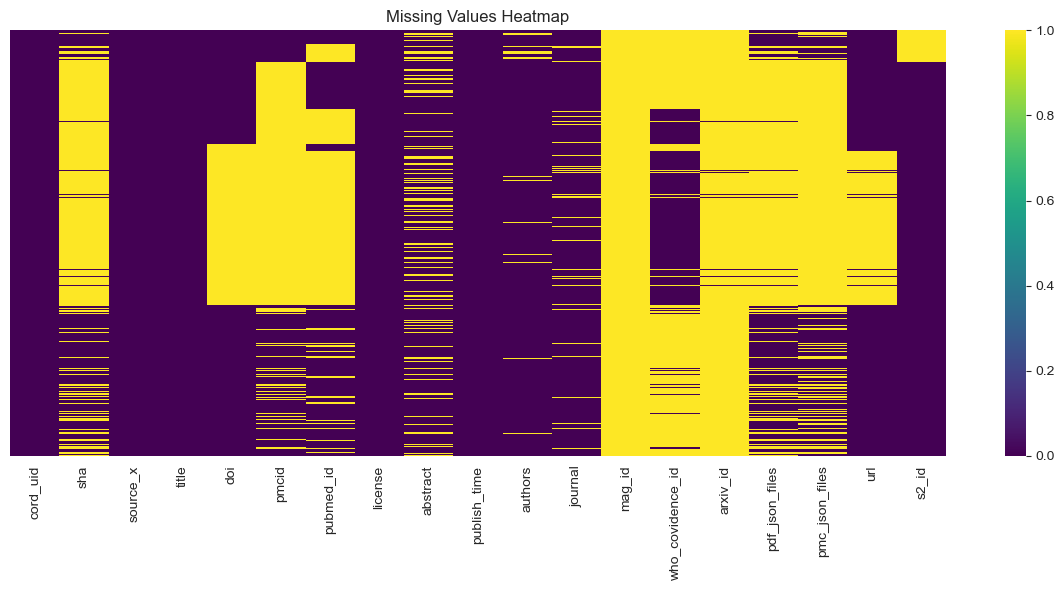

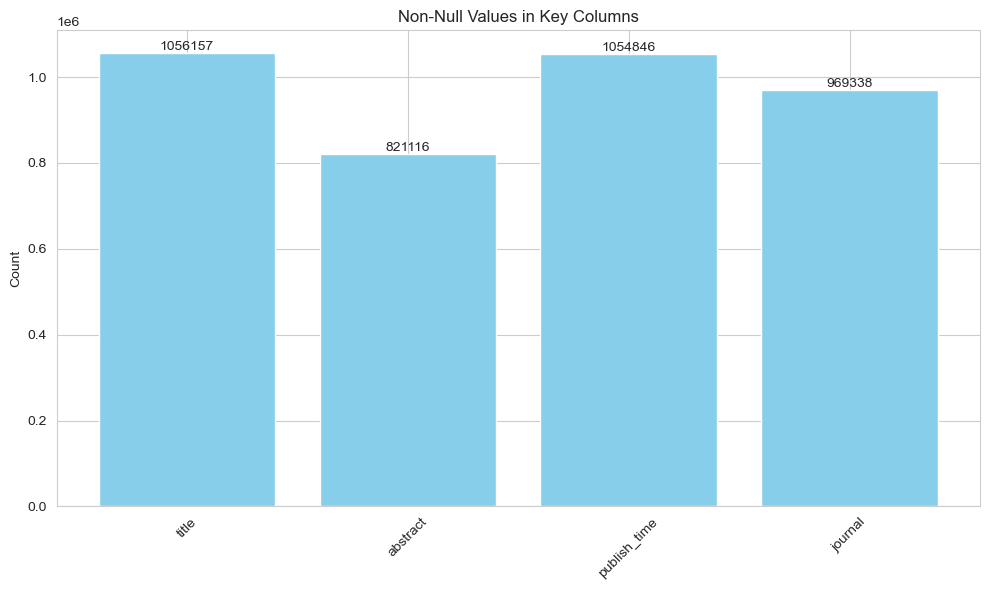

In [6]:

print("=" * 50)
print("📈 INITIAL DATA VISUALIZATIONS")
print("=" * 50)

# Plot missing values heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

# Distribution of non-null values for key columns
key_columns = ['title', 'abstract', 'publish_time', 'journal']
non_null_counts = [df[col].notnull().sum() for col in key_columns]

plt.figure(figsize=(10, 6))
bars = plt.bar(key_columns, non_null_counts, color='skyblue')
plt.title('Non-Null Values in Key Columns')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [7]:

print("=" * 50)
print("🧹 DATA CLEANING AND PREPARATION")
print("=" * 50)

# Identify columns with many missing values
print("Columns with more than 50% missing values:")
high_missing_cols = missing_df[missing_df['Missing Percentage'] > 50].index.tolist()
print(high_missing_cols)

# Create a cleaned version focusing on key columns
print("\nCreating cleaned dataset...")
# Keep rows that have at least title or abstract
df_clean = df.dropna(subset=['title'], how='all').copy()

if 'abstract' in df_clean.columns:
    df_clean = df_clean[df_clean['abstract'].notna() | df_clean['title'].notna()]

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")

🧹 DATA CLEANING AND PREPARATION
Columns with more than 50% missing values:
['sha', 'pmcid', 'pubmed_id', 'mag_id', 'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files']

Creating cleaned dataset...
Original dataset shape: (1056660, 19)
Cleaned dataset shape: (1056157, 19)
Rows removed: 503


In [8]:

print("\nPreparing data for analysis...")

# Convert date columns to datetime format
if 'publish_time' in df_clean.columns:
    # Handle different date formats
    df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')
    
    # Extract year for time-based analysis
    df_clean['publication_year'] = df_clean['publish_time'].dt.year
    
    print(f"Date range: {df_clean['publication_year'].min()} - {df_clean['publication_year'].max()}")

# Create abstract word count (if abstract exists)
if 'abstract' in df_clean.columns:
    df_clean['abstract_word_count'] = df_clean['abstract'].apply(
        lambda x: len(str(x).split()) if pd.notnull(x) else 0
    )

# Create title word count
if 'title' in df_clean.columns:
    df_clean['title_word_count'] = df_clean['title'].apply(
        lambda x: len(str(x).split()) if pd.notnull(x) else 0
    )

print("Cleaned dataset info:")
print(df_clean.info())


Preparing data for analysis...
Date range: 1856.0 - 2024.0
Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 1056157 entries, 0 to 1056659
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   cord_uid             1056157 non-null  object        
 1   sha                  373762 non-null   object        
 2   source_x             1056157 non-null  object        
 3   title                1056157 non-null  object        
 4   doi                  656278 non-null   object        
 5   pmcid                389562 non-null   object        
 6   pubmed_id            498432 non-null   object        
 7   license              1056157 non-null  object        
 8   abstract             821005 non-null   object        
 9   publish_time         518429 non-null   datetime64[ns]
 10  authors              1032355 non-null  object        
 11  journal              968835 non-null  

📋 CLEANING SUMMARY
Key columns after cleaning:
         Column  Original_Non_Null  Cleaned_Non_Null
0         title            1056157           1056157
1      abstract             821116            821005
2  publish_time            1054846            518429
3       journal             969338            968835


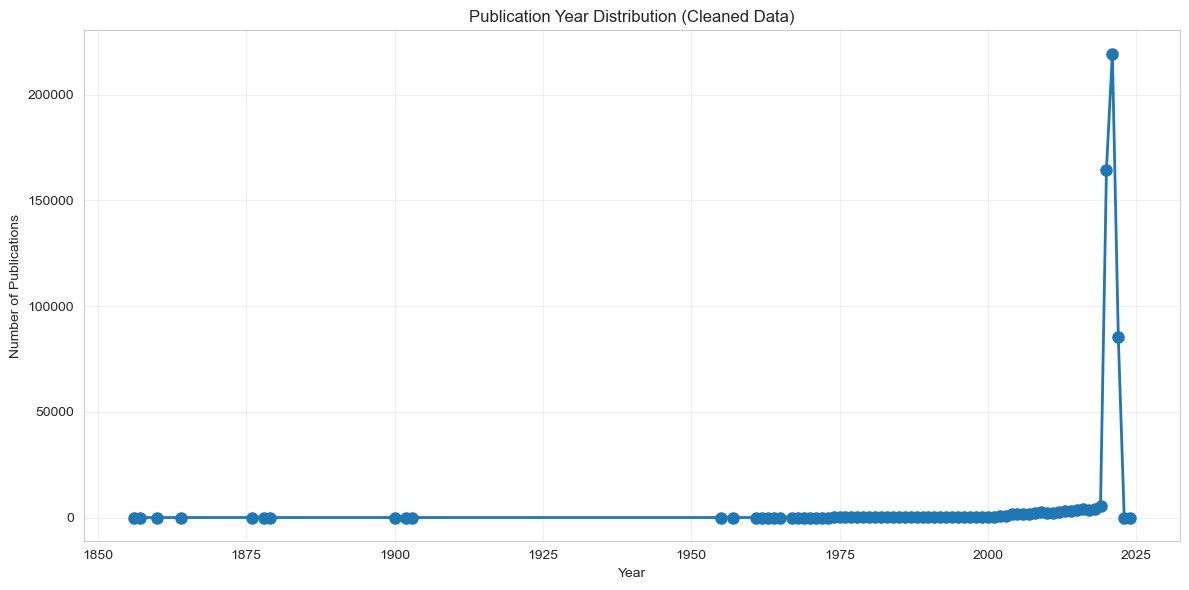

In [9]:

print("=" * 50)
print("📋 CLEANING SUMMARY")
print("=" * 50)

print("Key columns after cleaning:")
cleaning_summary = pd.DataFrame({
    'Column': ['title', 'abstract', 'publish_time', 'journal'],
    'Original_Non_Null': [df[col].notnull().sum() if col in df.columns else 0 for col in ['title', 'abstract', 'publish_time', 'journal']],
    'Cleaned_Non_Null': [df_clean[col].notnull().sum() if col in df_clean.columns else 0 for col in ['title', 'abstract', 'publish_time', 'journal']]
})

print(cleaning_summary)

# Distribution of publication years if available
if 'publication_year' in df_clean.columns:
    plt.figure(figsize=(12, 6))
    year_counts = df_clean['publication_year'].value_counts().sort_index()
    plt.plot(year_counts.index, year_counts.values, marker='o', linewidth=2, markersize=8)
    plt.title('Publication Year Distribution (Cleaned Data)')
    plt.xlabel('Year')
    plt.ylabel('Number of Publications')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

📊 DATA ANALYSIS AND VISUALIZATION


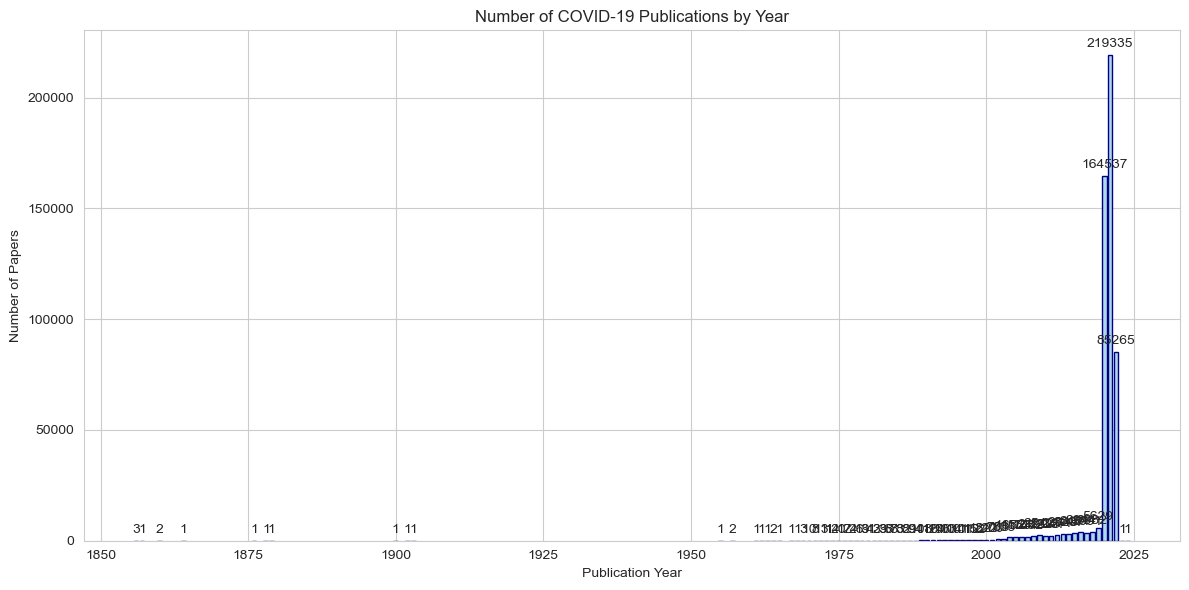

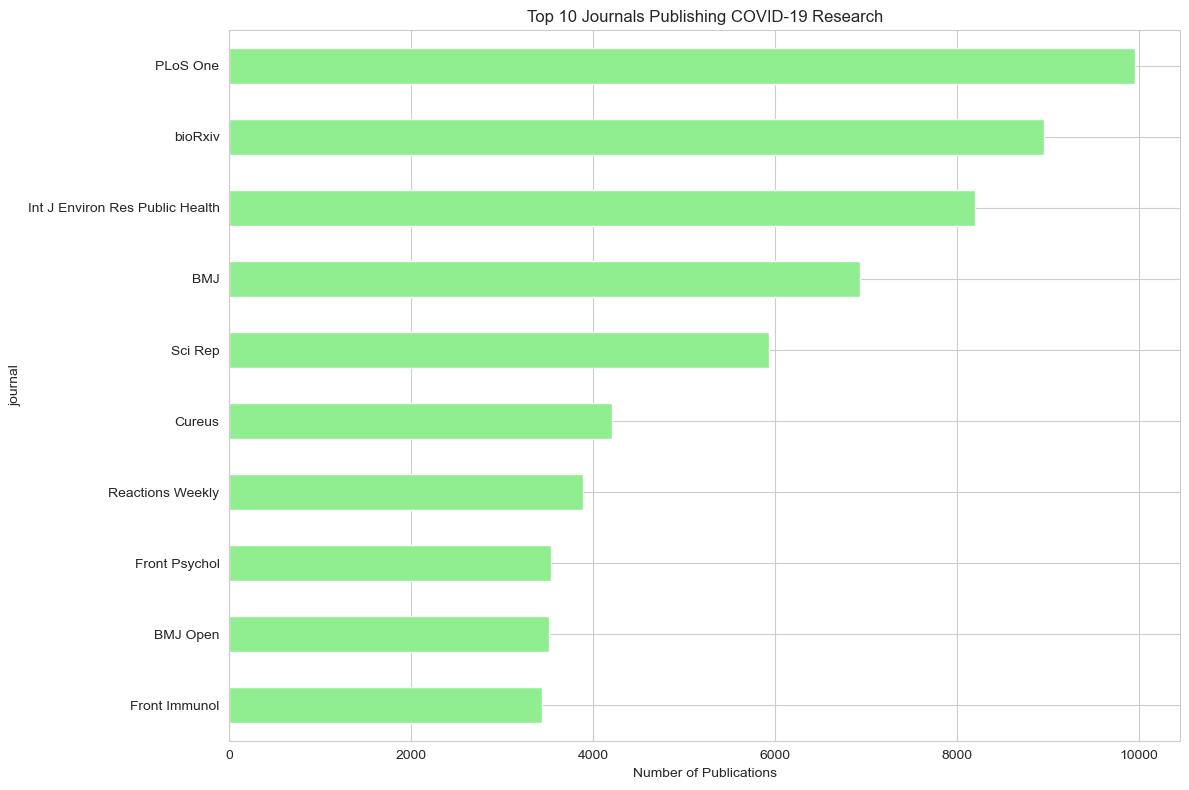

In [10]:

print("=" * 50)
print("📊 DATA ANALYSIS AND VISUALIZATION")
print("=" * 50)

# 1. Count papers by publication year
if 'publication_year' in df_clean.columns:
    year_counts = df_clean['publication_year'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 6))
    plt.bar(year_counts.index, year_counts.values, color='lightblue', edgecolor='darkblue')
    plt.title('Number of COVID-19 Publications by Year')
    plt.xlabel('Publication Year')
    plt.ylabel('Number of Papers')
    
    # Add value labels on bars
    for i, v in enumerate(year_counts.values):
        plt.text(year_counts.index[i], v + 0.01 * max(year_counts.values), 
                str(v), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# 2. Identify top journals
if 'journal' in df_clean.columns:
    top_journals = df_clean['journal'].value_counts().head(10)
    
    plt.figure(figsize=(12, 8))
    top_journals.plot(kind='barh', color='lightgreen')
    plt.title('Top 10 Journals Publishing COVID-19 Research')
    plt.xlabel('Number of Publications')
    plt.gca().invert_yaxis()  # Highest value on top
    plt.tight_layout()
    plt.show()

In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



Performing text analysis...


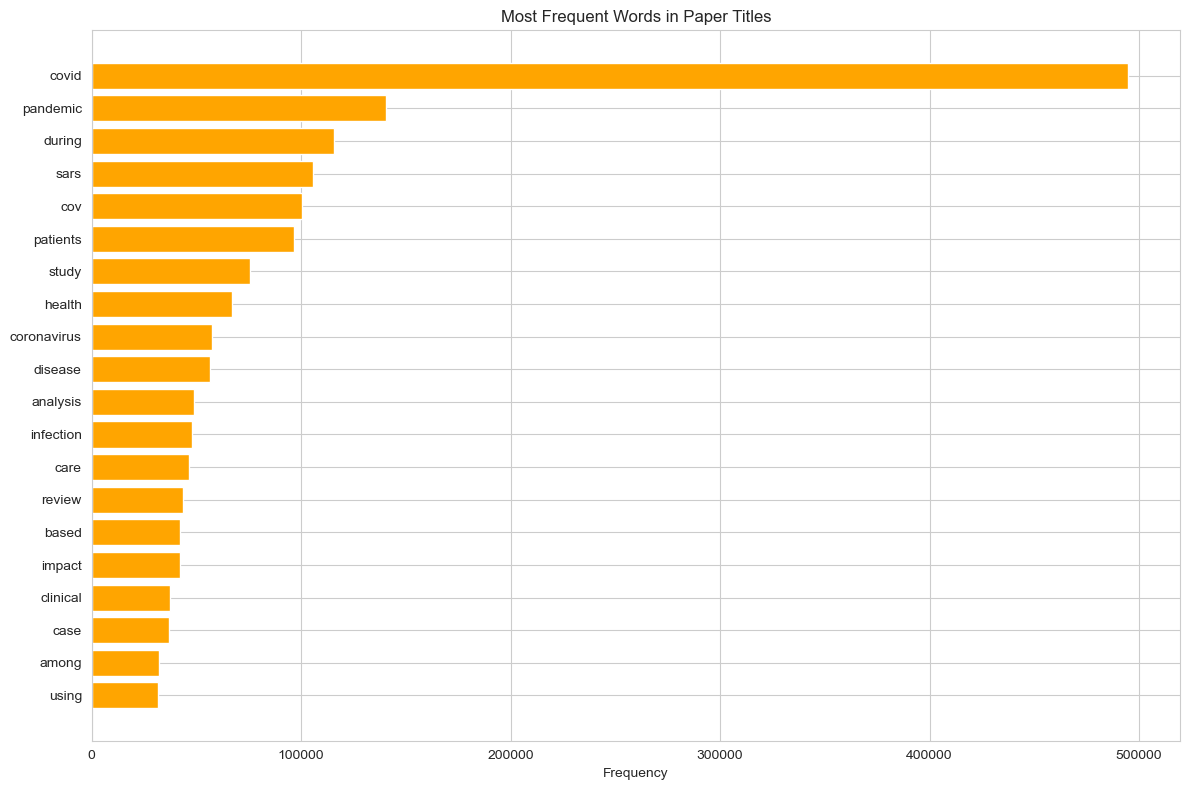

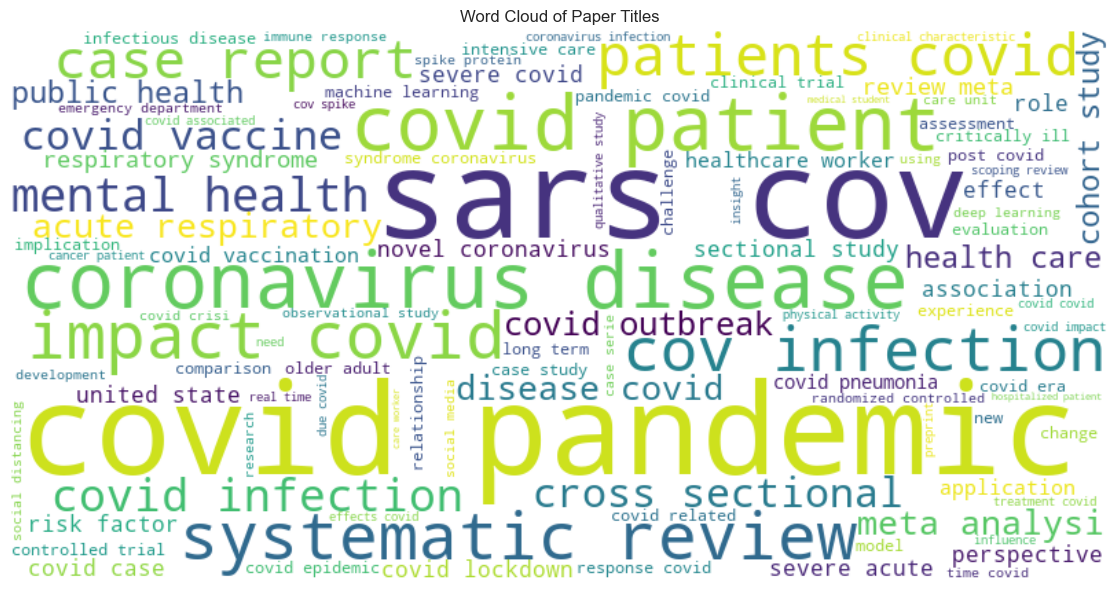

In [15]:
from wordcloud import WordCloud
from collections import Counter
import re

print("\nPerforming text analysis...")

# Simple word frequency in titles
if 'title' in df_clean.columns:
    # Combine all titles
    all_titles = ' '.join(df_clean['title'].dropna().astype(str))
    
    # Clean and tokenize
    words = re.findall(r'\b[a-zA-Z]{3,}\b', all_titles.lower())
    
    # Remove common stopwords
    stop_words = set(['the', 'and', 'of', 'in', 'to', 'a', 'for', 'with', 'on', 'by', 
                     'as', 'an', 'from', 'that', 'this', 'is', 'are', 'was', 'were'])
    filtered_words = [word for word in words if word not in stop_words]
    
    # Get most common words
    word_freq = Counter(filtered_words).most_common(20)
    
    # Plot word frequency
    words, counts = zip(*word_freq)
    
    plt.figure(figsize=(12, 8))
    plt.barh(words, counts, color='orange')
    plt.title('Most Frequent Words in Paper Titles')
    plt.xlabel('Frequency')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         max_words=100).generate(' '.join(filtered_words))
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Paper Titles')
    plt.tight_layout()
    plt.show()


Creating additional visualizations...


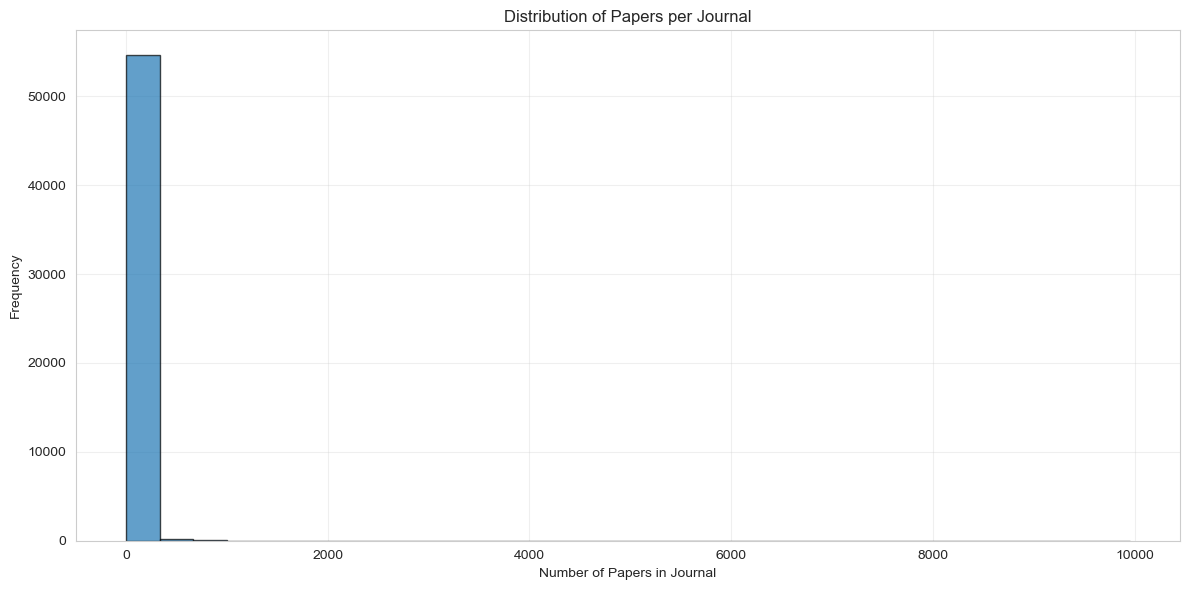

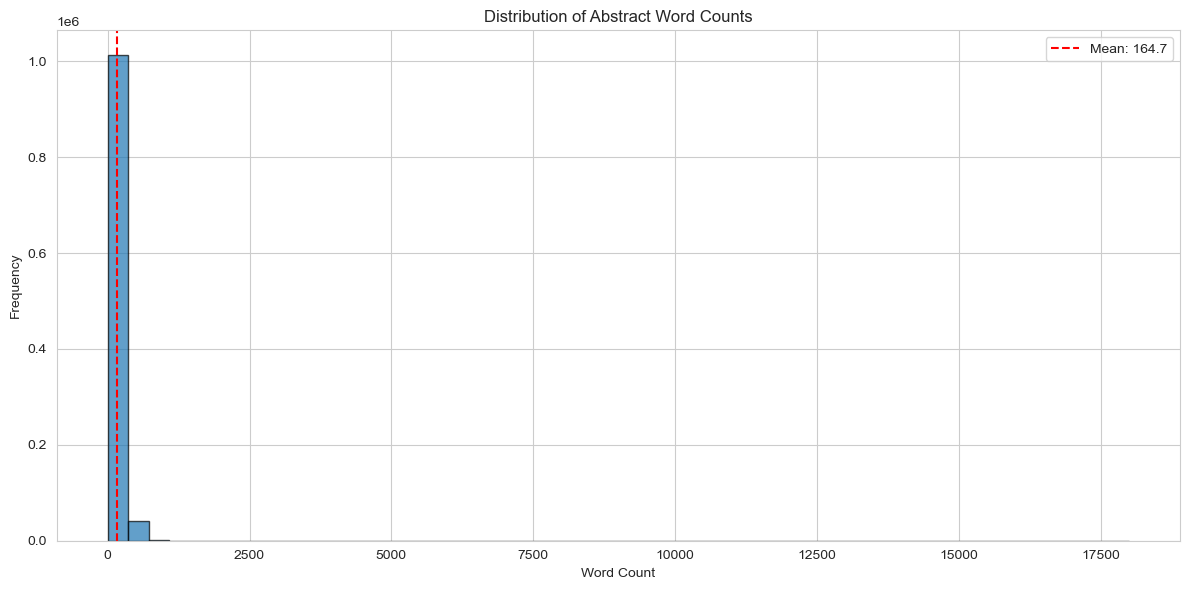

In [16]:

print("\nCreating additional visualizations...")

# Distribution of paper counts by source (if source column exists)
if 'journal' in df_clean.columns:
    journal_dist = df_clean['journal'].value_counts()
    
    # Plot distribution
    plt.figure(figsize=(12, 6))
    plt.hist(journal_dist.values, bins=30, edgecolor='black', alpha=0.7)
    plt.title('Distribution of Papers per Journal')
    plt.xlabel('Number of Papers in Journal')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Abstract length distribution if available
if 'abstract_word_count' in df_clean.columns:
    plt.figure(figsize=(12, 6))
    plt.hist(df_clean['abstract_word_count'], bins=50, edgecolor='black', alpha=0.7)
    plt.title('Distribution of Abstract Word Counts')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.axvline(df_clean['abstract_word_count'].mean(), color='red', linestyle='--', 
               label=f'Mean: {df_clean["abstract_word_count"].mean():.1f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [18]:

st_app_code = '''
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# Page configuration
st.set_page_config(
    page_title="CORD-19 Data Explorer",
    page_icon="🔬",
    layout="wide"
)

# Title and description
st.title("🔬 CORD-19 COVID-19 Research Explorer")
st.write("Explore the metadata of COVID-19 research papers from the CORD-19 dataset")

# Load data
@st.cache_data
def load_data():
    try:
        df = pd.read_csv('metadata.csv')
        # Basic cleaning
        df_clean = df.dropna(subset=['title']).copy()
        if 'publish_time' in df_clean.columns:
            df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')
            df_clean['publication_year'] = df_clean['publish_time'].dt.year
        return df_clean
    except:
        return None

df = load_data()

if df is None:
    st.error("Could not load metadata.csv. Please ensure it's in the same directory.")
else:
    # Sidebar filters
    st.sidebar.header("Filters")
    
    # Year filter
    if 'publication_year' in df.columns:
        min_year = int(df['publication_year'].min())
        max_year = int(df['publication_year'].max())
        year_range = st.sidebar.slider(
            "Select publication year range:",
            min_year, max_year, (min_year, max_year)
        )
        filtered_df = df[(df['publication_year'] >= year_range[0]) & 
                        (df['publication_year'] <= year_range[1])]
    else:
        filtered_df = df
    
    # Journal filter
    if 'journal' in df.columns:
        journals = ['All'] + df['journal'].dropna().unique().tolist()[:20]  # Top 20 journals
        selected_journal = st.sidebar.selectbox("Select journal:", journals)
        if selected_journal != 'All':
            filtered_df = filtered_df[filtered_df['journal'] == selected_journal]
    
    # Main content
    col1, col2 = st.columns(2)
    
    with col1:
        st.subheader("Dataset Overview")
        st.write(f"**Total papers:** {len(filtered_df):,}")
        st.write(f"**Columns:** {len(filtered_df.columns)}")
        
        if 'publication_year' in filtered_df.columns:
            st.write(f"**Year range:** {filtered_df['publication_year'].min()} - {filtered_df['publication_year'].max()}")
    
    with col2:
        st.subheader("Sample Data")
        st.dataframe(filtered_df[['title', 'journal', 'publication_year']].head(10) 
                    if 'journal' in filtered_df.columns else filtered_df[['title']].head(10))
    
    # Visualizations
    st.subheader("Visualizations")
    
    # Publications by year
    if 'publication_year' in filtered_df.columns:
        fig, ax = plt.subplots(figsize=(10, 6))
        year_counts = filtered_df['publication_year'].value_counts().sort_index()
        ax.bar(year_counts.index, year_counts.values, color='skyblue')
        ax.set_title('Publications by Year')
        ax.set_xlabel('Year')
        ax.set_ylabel('Number of Papers')
        st.pyplot(fig)
    
    # Top journals
    if 'journal' in filtered_df.columns:
        fig, ax = plt.subplots(figsize=(10, 6))
        top_journals = filtered_df['journal'].value_counts().head(10)
        top_journals.plot(kind='barh', ax=ax, color='lightgreen')
        ax.set_title('Top 10 Journals')
        ax.set_xlabel('Number of Publications')
        ax.invert_yaxis()
        st.pyplot(fig)
    
    # Word cloud
    if 'title' in filtered_df.columns:
        st.subheader("Title Word Cloud")
        all_titles = ' '.join(filtered_df['title'].dropna().astype(str))
        words = re.findall(r'\\b[a-zA-Z]{3,}\\b', all_titles.lower())
        stop_words = set(['the', 'and', 'of', 'in', 'to', 'a', 'for', 'with', 'on'])
        filtered_words = [word for word in words if word not in stop_words]
        
        if filtered_words:
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.imshow(wordcloud, interpolation='bilinear')
            ax.axis('off')
            st.pyplot(fig)

# Instructions to run
st.sidebar.markdown("---")
st.sidebar.info("To run this app: streamlit run app.py")
'''

# Save the Streamlit app code to a file (UTF-8 fix)
with open('app.py', 'w', encoding='utf-8') as f:
    f.write(st_app_code)

print("✅ Streamlit app code saved as 'app.py'")
print("To run the app: streamlit run app.py")


✅ Streamlit app code saved as 'app.py'
To run the app: streamlit run app.py


In [21]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [20]:
#Documentation and summary
print("=" * 50)
print("📝 PROJECT SUMMARY AND REFLECTION")
print("=" * 50)

# Summary statistics
if 'df_clean' in locals():
    print("FINAL DATASET SUMMARY:")
    print(f"• Total papers: {len(df_clean):,}")
    print(f"• Columns available: {len(df_clean.columns)}")
    
    if 'publication_year' in df_clean.columns:
        print(f"• Publication years: {df_clean['publication_year'].min()} - {df_clean['publication_year'].max()}")
        print(f"• Most productive year: {df_clean['publication_year'].mode().iloc[0] if not df_clean['publication_year'].mode().empty else 'N/A'}")
    
    if 'journal' in df_clean.columns:
        print(f"• Unique journals: {df_clean['journal'].nunique()}")
        print(f"• Top journal: {df_clean['journal'].mode().iloc[0] if not df_clean['journal'].mode().empty else 'N/A'}")

print("\nKEY FINDINGS:")
print("1. The dataset contains metadata for COVID-19 research papers")
print("2. Publication trends show the rapid growth of COVID-19 research")
print("3. Certain journals have been particularly active in publishing COVID-19 research")
print("4. Title analysis reveals common themes and keywords in the research")

print("\nCHALLENGES ENCOUNTERED:")
print("• Handling missing values in key columns")
print("• Converting and standardizing date formats")
print("• Processing text data for word frequency analysis")
print("• Creating interactive visualizations for the Streamlit app")

print("\nLEARNING OUTCOMES:")
print("✅ Gained experience with real-world data cleaning and preparation")
print("✅ Practiced exploratory data analysis and visualization techniques")
print("✅ Learned to create interactive web applications with Streamlit")
print("✅ Developed skills in documenting and presenting data analysis projects")

print("\nNEXT STEPS:")
print("• Perform more advanced text analysis (sentiment analysis, topic modeling)")
print("• Analyze author collaboration networks")
print("• Incorporate more interactive features in the Streamlit app")
print("• Add geographical analysis if location data is available")

📝 PROJECT SUMMARY AND REFLECTION
FINAL DATASET SUMMARY:
• Total papers: 1,056,157
• Columns available: 22
• Publication years: 1856.0 - 2024.0
• Most productive year: 2021.0
• Unique journals: 54993
• Top journal: PLoS One

KEY FINDINGS:
1. The dataset contains metadata for COVID-19 research papers
2. Publication trends show the rapid growth of COVID-19 research
3. Certain journals have been particularly active in publishing COVID-19 research
4. Title analysis reveals common themes and keywords in the research

CHALLENGES ENCOUNTERED:
• Handling missing values in key columns
• Converting and standardizing date formats
• Processing text data for word frequency analysis
• Creating interactive visualizations for the Streamlit app

LEARNING OUTCOMES:
✅ Gained experience with real-world data cleaning and preparation
✅ Practiced exploratory data analysis and visualization techniques
✅ Learned to create interactive web applications with Streamlit
✅ Developed skills in documenting and presenti